# **Telecom X - Análisis de Evasión de Clientes**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

#📌 Extracción

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')


In [ ]:
datos_iniciales=pd.concat([df['customerID'],df['Churn']],axis=1)
cliente=pd.json_normalize(df['customer'])
phone=pd.json_normalize(df['phone'])
internet=pd.json_normalize(df['internet'])
account=pd.json_normalize(df['account'])

#🔧 Transformación

### Transformación datos iniciales

In [ ]:
datos_iniciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [ ]:
datos_iniciales.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [ ]:
pd.unique(datos_iniciales['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [ ]:
datos_iniciales['Churn'] = pd.to_numeric(
    datos_iniciales['Churn'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

In [ ]:
pd.unique(datos_iniciales['Churn'])

array([0, 1])

In [ ]:
datos_iniciales

,customerID,Churn
0,0002-ORFBO,0
1,0003-MKNFE,0
2,0004-TLHLJ,1
3,0011-IGKFF,1
4,0013-EXCHZ,1
...,...,...
7262,9987-LUTYD,0
7263,9992-RRAMN,1
7264,9992-UJOEL,0
7265,9993-LHIEB,0


### Transformación de clientes

In [ ]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [ ]:
cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [ ]:
cliente['Partner'] = cliente['Partner'].map({'Yes': 1, 'No': 0})
cliente['Dependents'] = cliente['Dependents'].map({'Yes': 1, 'No': 0})

In [ ]:
cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,1,1,9
1,Male,0,0,0,9
2,Male,0,0,0,4
3,Male,1,1,0,13
4,Female,1,1,0,3


### Transformación de phone

In [ ]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [ ]:
phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [ ]:
phone['PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
phone['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [ ]:
columnas = ['PhoneService', 'MultipleLines']
phone[columnas] = phone[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No phone service': 0}))

In [ ]:
phone.head()

,PhoneService,MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


### Transformación de internet

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


In [ ]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [ ]:
internet['OnlineSecurity'].unique()
#internet['OnlineBackup'].unique()
#internet['DeviceProtection'].unique()
#internet['TechSupport'].unique()
#internet['StreamingTV'].unique()
#internet['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
columnas = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet[columnas] = internet[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0}))

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   int64 
 2   OnlineBackup      7267 non-null   int64 
 3   DeviceProtection  7267 non-null   int64 
 4   TechSupport       7267 non-null   int64 
 5   StreamingTV       7267 non-null   int64 
 6   StreamingMovies   7267 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 397.5+ KB


In [ ]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,0,1,0,1,1,0
1,DSL,0,0,0,0,0,1
2,Fiber optic,0,0,1,0,0,0
3,Fiber optic,0,1,1,0,1,1
4,Fiber optic,0,0,0,1,1,0


### Transformación cuenta

In [ ]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


In [ ]:
account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
cantidad_vacios = account['Charges.Monthly'].eq('').sum()
cantidad_vacios

np.int64(0)

In [ ]:
cantidad_vacios = account['Charges.Total'].str.strip().eq('').sum()
cantidad_vacios

np.int64(11)

In [ ]:
cantidad_nan = account['Charges.Total'].isna().sum()
cantidad_nan

np.int64(0)

In [ ]:
account['Charges.Total'] = pd.to_numeric(
    account['Charges.Total'].str.replace(r'[\$,]', '', regex=True),
    errors='coerce'
).fillna(0)

In [ ]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   float64
dtypes: float64(2), object(3)
memory usage: 284.0+ KB


In [ ]:
pd.unique(account['Contract'])

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [ ]:
pd.unique(account['PaperlessBilling'])

array(['Yes', 'No'], dtype=object)

In [ ]:
account['PaperlessBilling'] = pd.to_numeric(
    account['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

/tmp/ipython-input-2368989687.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  account['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),


In [ ]:
account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,1,Mailed check,65.6,593.30
1,Month-to-month,0,Mailed check,59.9,542.40
2,Month-to-month,1,Electronic check,73.9,280.85
3,Month-to-month,1,Electronic check,98.0,1237.85
4,Month-to-month,1,Mailed check,83.9,267.40


In [ ]:
pd.unique(account['PaymentMethod'])

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [ ]:
account['Cuentas_Diarias'] = account['Charges.Monthly'] / 30.5
account['Cuentas_Diarias'] = account['Cuentas_Diarias'].round(2)
account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,One year,1,Mailed check,65.6,593.30,2.15
1,Month-to-month,0,Mailed check,59.9,542.40,1.96
2,Month-to-month,1,Electronic check,73.9,280.85,2.42
3,Month-to-month,1,Electronic check,98.0,1237.85,3.21
4,Month-to-month,1,Mailed check,83.9,267.40,2.75


#📊 Carga y análisis

In [ ]:
df_final = pd.concat([datos_iniciales,cliente,phone,internet,account], axis=1)

In [ ]:
df_final.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.121994
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,0.987893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.160000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.300000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.950000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.890000


In [ ]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.15
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.96
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.42
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.21
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.75


In [ ]:
df_final.to_csv('df_final.csv', index=False)

In [ ]:
churn_counts = df_final['Churn'].value_counts()
churn_counts

,count
Churn,
0,5398
1,1869


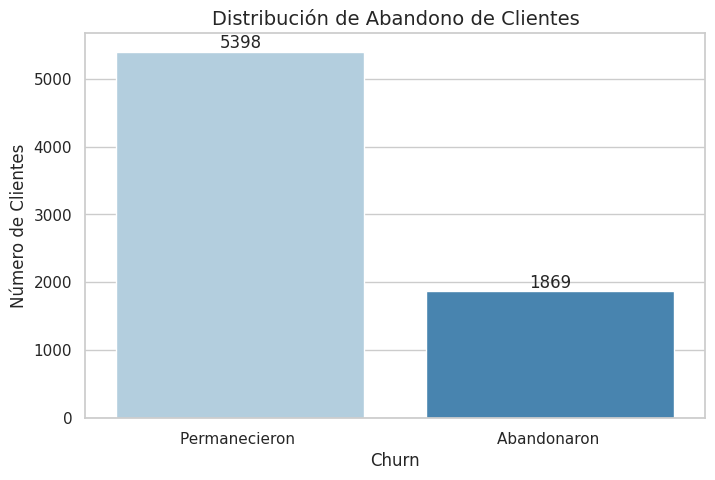

In [ ]:
# Configurar el estilo
sns.set(style="whitegrid")

# Crear una paleta de un solo color con diferentes tonos
custom_palette = sns.color_palette("Blues", n_colors=2)  # Puedes probar "Reds", "Greens", etc.

# Graficar
plt.figure(figsize=(8, 5))
sns.barplot(
    x=churn_counts.index,
    y=churn_counts.values,
    hue=churn_counts.index,
    palette=custom_palette,
    legend=False
)

plt.title('Distribución de Abandono de Clientes', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks([0, 1], ['Permanecieron ', 'Abandonaron '])

for i, count in enumerate(churn_counts.values):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)

plt.show()

/tmp/ipython-input-2904965852.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2904965852.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


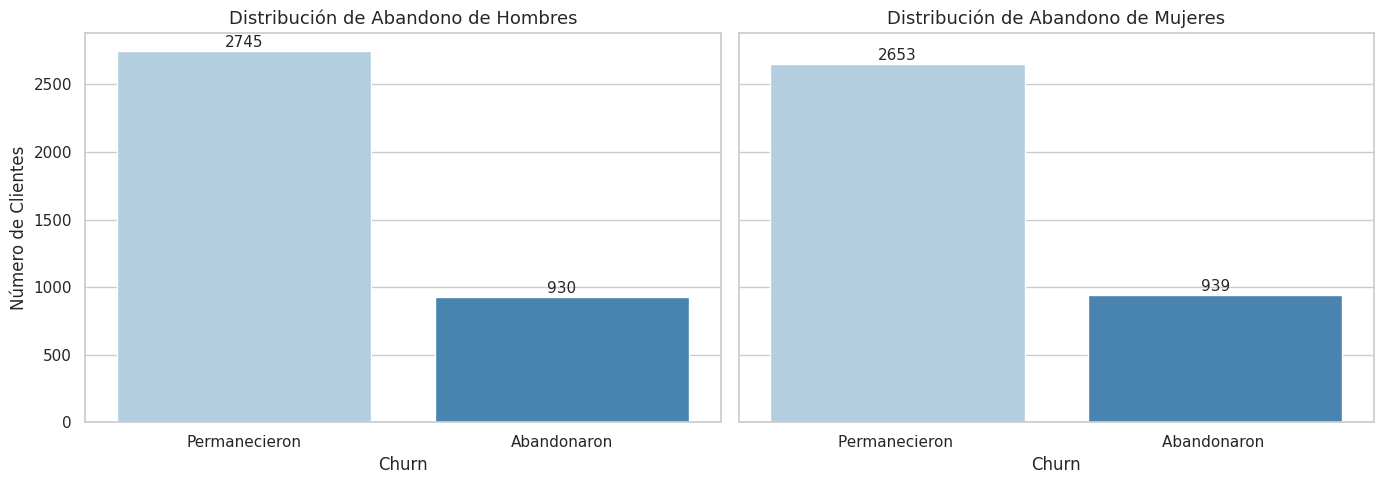

In [ ]:
# Filtrar datos por género
hombres = df_final[df_final['gender'] == 'Male']['Churn'].value_counts().sort_index()
mujeres = df_final[df_final['gender'] == 'Female']['Churn'].value_counts().sort_index()

# Crear figura
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
sns.set(style="whitegrid")

# Gráfico para hombres
sns.barplot(
    x=hombres.index,
    y=hombres.values,
    palette=custom_palette,
    ax=axes[0]
)
axes[0].set_title('Distribución de Abandono de Hombres', fontsize=13)
axes[0].set_ylabel('Número de Clientes')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Permanecieron', 'Abandonaron'])

for i, count in enumerate(hombres.values):
    axes[0].text(i, count + 30, str(count), ha='center', fontsize=11)

# Gráfico para mujeres
sns.barplot(
    x=mujeres.index,
    y=mujeres.values,
    palette=custom_palette,
    ax=axes[1]
)
axes[1].set_title('Distribución de Abandono de Mujeres', fontsize=13)
axes[1].set_ylabel('')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Permanecieron ', 'Abandonaron '])

for i, count in enumerate(mujeres.values):
    axes[1].text(i, count + 30, str(count), ha='center', fontsize=11)

plt.tight_layout()
plt.show()


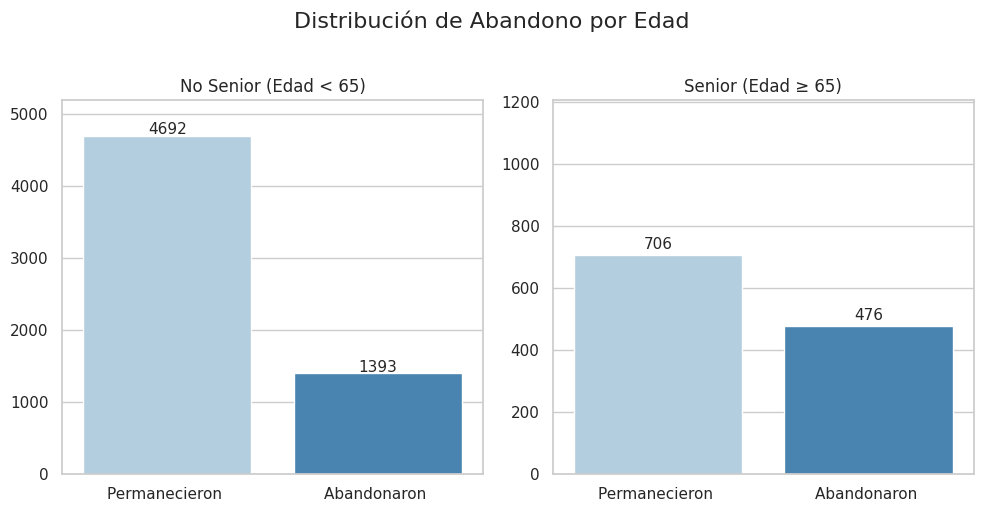

In [ ]:
# Filtrar datos
no_senior = df_final[df_final['SeniorCitizen'] == 0]['Churn'].value_counts().sort_index()
senior = df_final[df_final['SeniorCitizen'] == 1]['Churn'].value_counts().sort_index()

# Estilo
sns.set(style="whitegrid")

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Distribución de Abandono por Edad', fontsize=16, y=1.02)

# Función de ploteo reutilizable
def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=custom_palette,
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Permanecieron ', 'Abandonaron '])
    ax.set_ylim(0, max(data.values) + 500)
    for i, count in enumerate(data.values):
        ax.text(i, count + 20, str(count), ha='center', fontsize=11)

# Llamar a la función para ambos grupos
plot_churn(no_senior, axs[0], 'No Senior (Edad < 65)')
plot_churn(senior, axs[1], 'Senior (Edad ≥ 65)')

plt.tight_layout()
plt.show()


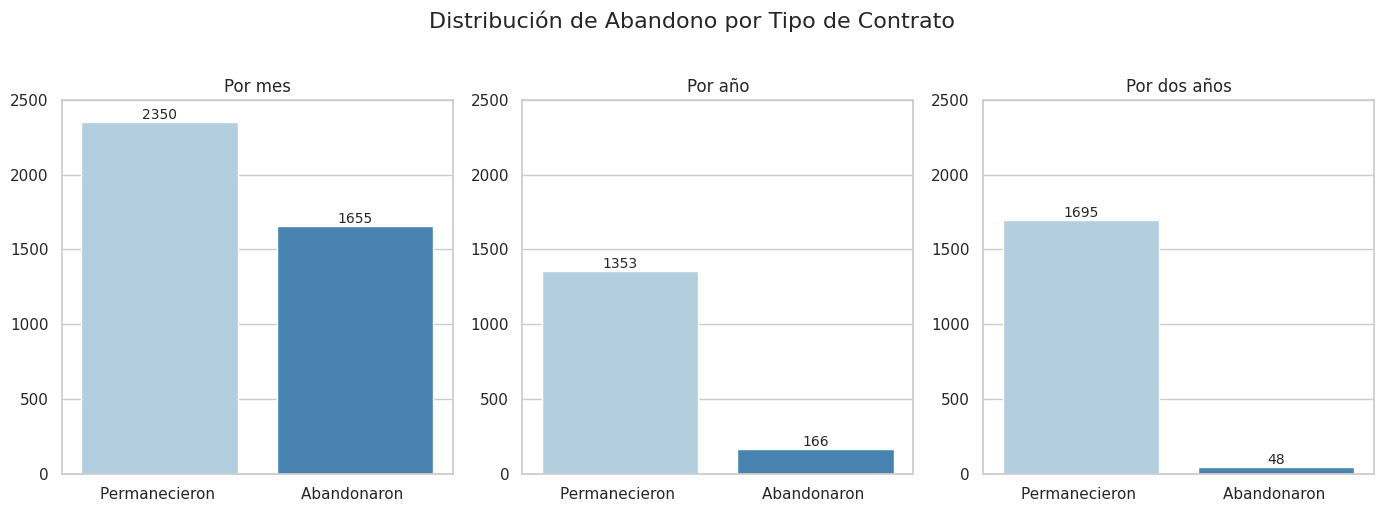

In [ ]:
# Obtener conteos ordenados
anio = df_final[df_final['Contract'] == 'One year']['Churn'].value_counts().sort_index()
mes = df_final[df_final['Contract'] == 'Month-to-month']['Churn'].value_counts().sort_index()
anios2 = df_final[df_final['Contract'] == 'Two year']['Churn'].value_counts().sort_index()

# Estilo
sns.set(style="whitegrid")

# Crear figura
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
plt.suptitle('Distribución de Abandono por Tipo de Contrato', fontsize=16, y=1.02)

# Función para graficar
def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=custom_palette,
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Permanecieron ', 'Abandonaron '])
    ax.set_ylim(0, 2500)
    for i, count in enumerate(data.values):
        ax.text(i, count + 20, str(count), ha='center', fontsize=10)

# Graficar los tres tipos de contrato
plot_churn(mes, axs[0], 'Por mes')
plot_churn(anio, axs[1], 'Por año')
plot_churn(anios2, axs[2], 'Por dos años')

plt.tight_layout()
plt.show()


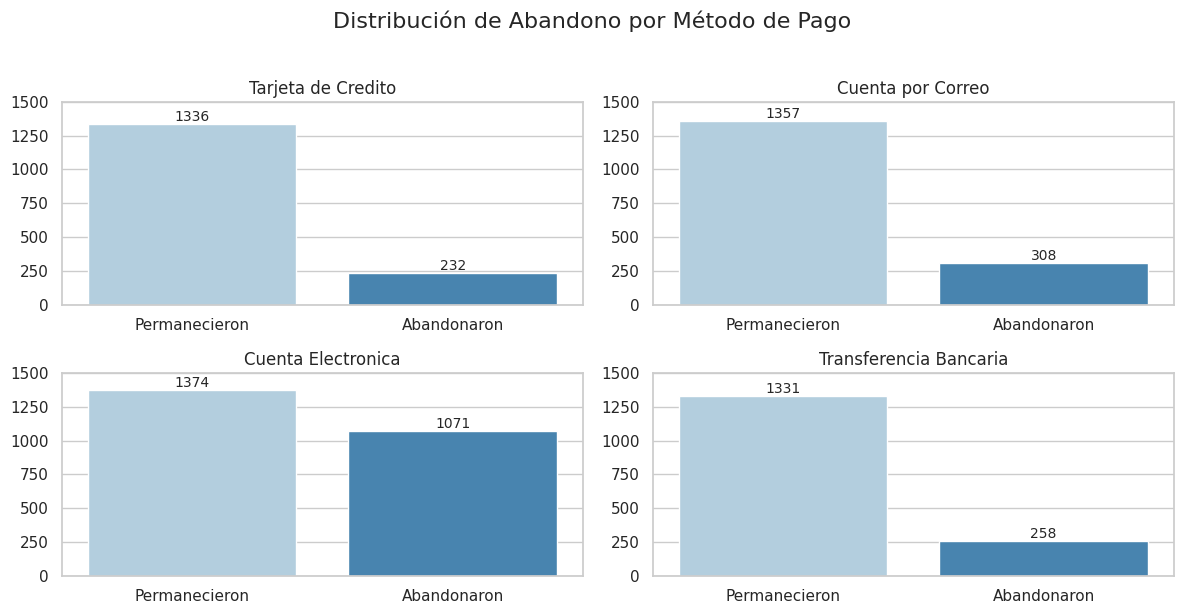

In [ ]:
# Filtrar los datos por método de pago
check = df_final[df_final['PaymentMethod'] == 'Mailed check']['Churn'].value_counts().sort_index()
electronic = df_final[df_final['PaymentMethod'] == 'Electronic check']['Churn'].value_counts().sort_index()
credit = df_final[df_final['PaymentMethod'] == 'Credit card (automatic)']['Churn'].value_counts().sort_index()
bank = df_final[df_final['PaymentMethod'] == 'Bank transfer (automatic)']['Churn'].value_counts().sort_index()

# Configurar estilo
sns.set(style="whitegrid")

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 6))
plt.suptitle('Distribución de Abandono por Método de Pago', fontsize=16, y=1.02)

# Función reutilizable para graficar
def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=custom_palette,
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Permanecieron', 'Abandonaron'])
    ax.set_ylim(0, 1500)
    for i, count in enumerate(data.values):
        ax.text(i, count + 20, str(count), ha='center', fontsize=10)

# Graficar cada método
plot_churn(credit, axs[0][0], 'Tarjeta de Credito')
plot_churn(check, axs[0][1], 'Cuenta por Correo')
plot_churn(electronic, axs[1][0], 'Cuenta Electronica')
plot_churn(bank, axs[1][1], 'Transferencia Bancaria')

plt.tight_layout()
plt.show()


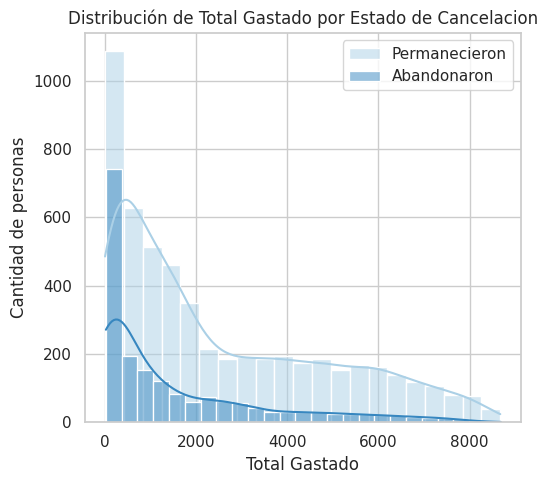

In [ ]:
def hist_gasto():
    # Paleta con tonos del mismo color
    color_permanecieron = custom_palette[0]  # tono más claro
    color_abandonaron = custom_palette[1]    # tono más oscuro

    TotalGastadoAbandonaron = df_final[df_final['Churn'] == '1']['Charges.Total']
    TotalGastadoPermanecieron = df_final[df_final['Churn'] == '0']['Charges.Total']

    # Crear figura
    plt.figure(figsize=(10, 5))

    # Histograma de Total Gastado
    plt.subplot(1, 2, 1)
    sns.histplot(TotalGastadoPermanecieron, color=color_permanecieron, label='Permanecieron', kde=True)
    sns.histplot(TotalGastadoAbandonaron, color=color_abandonaron, label='Abandonaron', kde=True)
    plt.title('Distribución de Total Gastado por Estado de Cancelacion')
    plt.xlabel('Total Gastado')
    plt.ylabel('Cantidad de personas')
    plt.legend()

    plt.tight_layout()
    plt.show()

hist_gasto()

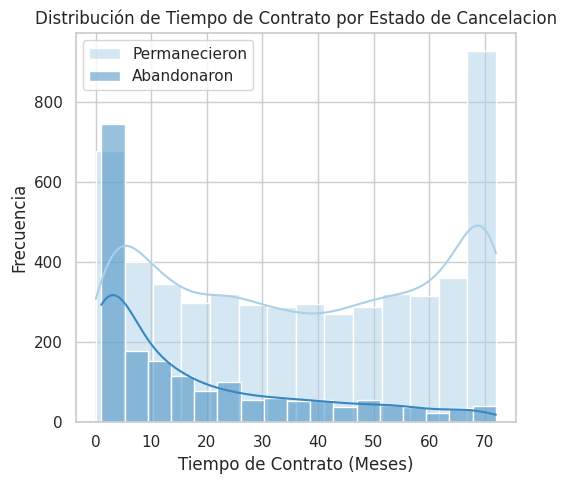

In [ ]:
def hist_tiempo():
    # Paleta con tonos del mismo color
    color_permanecieron = custom_palette[0]  # tono más claro
    color_abandonaron = custom_palette[1]    # tono más oscuro

    # Crear figura
    plt.figure(figsize=(10, 5))

    tiempoDeContratoPermanecieron = df_final[df_final['Churn'] == '0']['tenure']
    tiempoDeContratoAbandonaron = df_final[df_final['Churn'] == '1']['tenure']

    # Histograma de Tiempo de Contrato
    plt.subplot(1, 2, 2)
    sns.histplot(tiempoDeContratoPermanecieron, color=color_permanecieron, label='Permanecieron', kde=True)
    sns.histplot(tiempoDeContratoAbandonaron, color=color_abandonaron, label='Abandonaron', kde=True)
    plt.title('Distribución de Tiempo de Contrato por Estado de Cancelacion')
    plt.xlabel('Tiempo de Contrato (Meses)')
    plt.ylabel('Frecuencia')
    plt.legend()

    plt.tight_layout()
    plt.show()
hist_tiempo()

In [ ]:
print("--- Total Gastado de los que Abandonaron ---")
print(TotalGastadoAbandonaron.describe())
print("\n--- Total Gastado de los que Permanecieron ---")
print(TotalGastadoPermanecieron.describe())

print("\n--- Tiempo de Contrato de los que Abandonaron ---")
print(tiempoDeContratoAbandonaron.describe())
print("\n--- Tiempo de Contrato de los que Permanecieron ---")
print(tiempoDeContratoPermanecieron.describe())

--- Total Gastado de los que Abandonaron ---
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Charges.Total, dtype: float64

--- Total Gastado de los que Permanecieron ---
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Charges.Total, dtype: float64

--- Tiempo de Contrato de los que Abandonaron ---
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: tenure, dtype: float64

--- Tiempo de Contrato de los que Permanecieron ---
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: tenure, dtype: float64


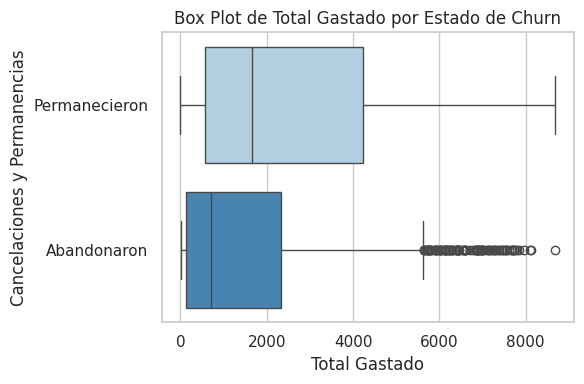

In [ ]:
def boxplot_gasto():
    df_final['Churn'] = df_final['Churn'].astype(str)

    # Paleta de colores consistente
    color_dict = {'0': color_permanecieron, '1': color_abandonaron}

    # --- PRIMERA FIGURA: Boxplot de Total Gastado ---
    plt.figure(figsize=(6, 4))
    sns.boxplot(y='Churn', x='Charges.Total', data=df_final, palette=color_dict,hue='Churn', legend=False)
    plt.title('Box Plot de Total Gastado por Estado de Churn')
    plt.ylabel('Cancelaciones y Permanencias')
    plt.xlabel('Total Gastado')
    plt.yticks([0, 1], ['Permanecieron', 'Abandonaron'])  # Etiquetas personalizadas
    plt.tight_layout()
    plt.show()
boxplot_gasto()

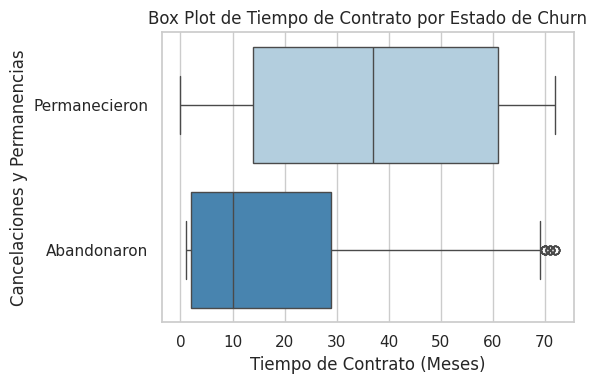

In [ ]:
def boxplot_tiempo():
    plt.figure(figsize=(6, 4))
    sns.boxplot(y='Churn', x='tenure', data=df_final, palette=color_dict, hue='Churn', legend=False)
    plt.title('Box Plot de Tiempo de Contrato por Estado de Churn')
    plt.ylabel('Cancelaciones y Permanencias')
    plt.xlabel('Tiempo de Contrato (Meses)')
    plt.yticks([0, 1], ['Permanecieron', 'Abandonaron'])  # Etiquetas personalizadas
    plt.tight_layout()
    plt.show()
boxplot_tiempo()

In [ ]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.15
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.96
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.42
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.21
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.81
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.79
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.22


#📄Informe final
## **Informe de Análisis de Cancelación de Clientes**

### **Introducción**

Este análisis tiene como objetivo entender por qué los clientes están cancelando sus servicios con Telecom X, un problema que afecta el ingreso y crecimiento de la compañia. A partir de los datos disponibles, se busca identificar patrones que expliquen esta evasión y así apoyar al equipo de Data Science en la creación de modelos predictivos. Los resultados permitirán diseñar estrategias más efectivas para retener clientes.


### **Limpieza y Tratamiento de Datos**

Se trabajó con un archivo JSON que fue normalizado en cinco DataFrames para facilitar su análisis. En el proceso se realizaron los siguientes pasos.

1. Se convirtieron respuestas como 'Yes' y 'No' a 1 y 0 para facilitar el análisis.

2. Reemplazo de valores como “No service” por 0, asumiendo que equivalen a una respuesta negativa.

3. Corrección de la columna ‘Charges.Total’: Se detectaron cadenas vacías (en lugar de NaN) que se reemplazaron por 0 y se convirtió la columna a tipo numérico.

4. Se calculo una nueva variable llamada 'Cuentas_Diarias' calculada a partir del cargo mensual dividido entre 30.5 días, para obtener un estimado del gasto diario.

5. Todos los DataFrames fueron integrados en uno solo (df_final) para facilitar el análisis global.

### **Análisis Exploratorio de Datos**

El análisis permitió identificar patrones asociados a la cancelación de servicios y entender mejor el comportamiento de los clientes.

**Visión General de las cancelaciones:**

Del total de clientes, 5398 permanecieron y 1869 cancelaron. Siendo el 25% de personas que contrataban el servicio las que cancelaron. Esta proporción destaca la necesidad de investigar mas afondo los factores detrás del abandono.


**Variables Categóricas:**

1. Género: En esta categoría se registraron 939 mujeres que cancelaron, minetras que de hombres fueron 930. Al ser tan similares los datos no podemos sacar ninguna conclusión de esta categoría.

2. Ciudadano Mayor: Los clientes que cancelaron el servicio que son adultos mayores representan el 25% de personas que cancelaron, el cual es un porcentaje alto, pero lo mejor sería centrarnos en el 75% que no son adultos mayores

3. Tipo de Contrato: Los contratos mensuales tienen la tasa más alta de cancelación. En cambio, los contratos a dos años muestran mayor retención.

4. Método de Pago: El cheque electrónico se asocia con más abandonos teniendo un 57% con respecto a los otros metodos de pago. Por el contrario, los pagos con tarjeta de crédito muestran mayor estabilidad.

**Variables Numéricas:**

**Total Gastado:**

Los clientes que cancelan tienen un gasto promedio mucho menor (1531.80 vs 2535.26) y una mediana de gasto notablemente más baja (703.55 vs 1663.63). El 75% de ellos gastó menos de $2331.30, valor que está por debajo incluso del 75% de los que permanecen.

**Histograma de Gasto**

Refuerza esta tendencia, con un pico claro en los rangos más bajos para clientes que abandonan.

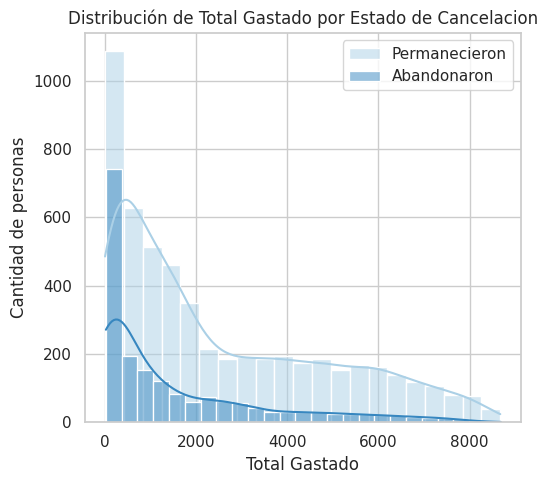

In [ ]:
hist_gasto()

**Box Plot de Gasto**

Muestra que tanto la mediana como la mayoría de los valores se concentran en niveles bajos para quienes cancelan, aunque hay algunos outliers con gastos altos.

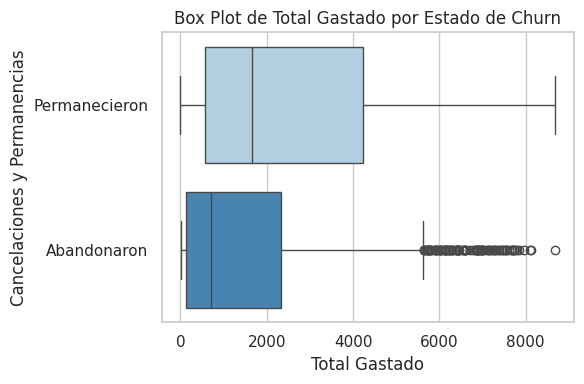

In [ ]:
boxplot_gasto()

**Tiempo de Contrato:**

Respecto al tiempo de contrato, los clientes que se van lo hacen temprano: promedio de 18 meses y mediana de 10 meses, frente a 37 meses en ambos casos para los que se quedan.

**Histograma de Tiempo de Contrato**

Muestra una fuerte concentración de cancelaciones en los primeros meses, mientras que los clientes fieles tienden a tener contratos más largos y distribuidos de forma más uniforme.

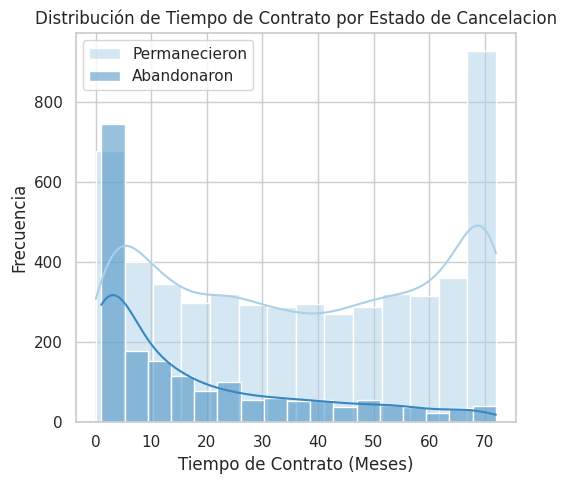

In [ ]:
hist_tiempo()

**Box Plot de Tiempo de Contrato**
La caja del grupo que cancela está completamente contenida en el primer cuartil del grupo que permanece, reflejando una relación muy corta con la empresa.

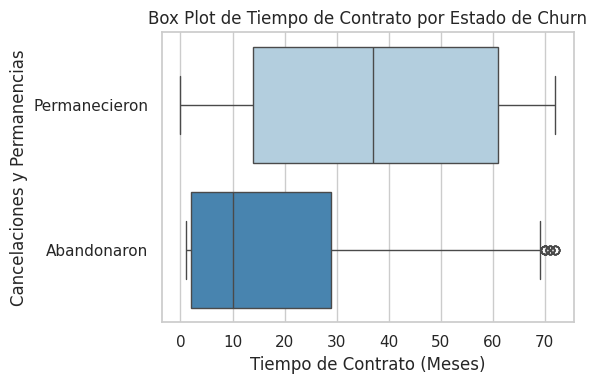

In [ ]:
boxplot_tiempo()

### **Conclusiones e Insights**
El análisis de las cancelaciones en Telecom X reveló patrones importantes que permiten entender mejor el perfil de los clientes que cancelan el servicio y ofrecen oportunidades concretas para intervenir y mejorar la retención.

🔍 **Hallazgos Clave:**

**Alta tasa de cancelación:** Aproximadamente el 25% de los clientes han cancelado el servicio, lo que representa un impacto significativo en los ingresos de la compañía.

**Tipo de contrato como factor crítico:** Los contratos mensuales están fuertemente asociados al abandono, mientras que los contratos a dos años muestran un comportamiento opuesto, lo que sugiere que fomentar compromisos a largo plazo podría reducir las cancelaciones.

**Método de pago relevante:** El uso de cheques electrónicos está relacionado con una mayor tasa de cancelación (57%). Métodos como la tarjeta de crédito parecen ofrecer más estabilidad y lealtad.

**Duración de la relación con el cliente:** La mayoría de los abandonos ocurren en los primeros meses de contrato (mediana de 10 meses para quienes se van, vs. 37 meses para quienes se quedan). Esto indica que los primeros meses son decisivos para generar una buena experiencia y fidelizar al cliente.

**Gasto total más bajo entre quienes cancelan:** Los clientes que se dan de baja tienden a gastar mucho menos durante su tiempo con la empresa, lo que podría reflejar una menor satisfacción o menor uso del servicio.

**Poco impacto del género y edad avanzada:** Aunque hubo más mujeres que cancelaron, la diferencia es mínima. Lo mismo ocurre con los adultos mayores, por lo que estas variables no parecen ser determinantes.

💡 **Recomendaciones Basadas en los Datos:**

1. Incentivar contratos a largo plazo mediante promociones o descuentos.

2. Rediseñar la experiencia del cliente en los primeros meses, con atención proactiva, beneficios iniciales o encuestas de satisfacción temprana.

3. Revisar los métodos de pago ofrecidos, limitando el uso de cheques electrónicos o incentivando medios digitales más estables.

4. Identificar clientes de bajo gasto y corto tiempo de permanencia como grupo de riesgo y aplicar estrategias de retención específicas para ellos.